# 1 Import and Init

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
seed=1996
np.random.seed(seed)
random.seed(seed)

In [ ]:
N,k=150,10
learning_rate=0.001
mu=np.zeros(k)
sigma=2 # " dans la papier sigma_square=100"
std=sigma*np.identity(k)
beta_none=np.array([(i+1)/100 for i in range(k) ]).reshape(k,1)
data=np.random.randn(N+50,k)
B=3000
beta_none.reshape(1,k)

array([[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]])

In [ ]:
# Normalisation des données pour éviter d'avoir des pbs liées à
min_=np.mean(data,axis=0)
max_=np.max(data,axis=0)
data=(data-min_)/max_-min_

#  2 We generate random data and make some basic descriptive analysis.


In [ ]:
def indicator(x,threshold=-0.001) :
    if x>=threshold:
        return int(1)
    else:
            return int(0)

In [ ]:
output=np.zeros(N+50).reshape(N+50,1)
for i in range(N+50):
    z=np.random.randn(1)
    output[i]=indicator(np.dot(data[i],beta_none))

In [ ]:
X_test,Y_test=data[150:],output[150:]
X,Y=data[0:150],output[0:150]


In [ ]:
X.shape,Y.shape

((150, 10), (150, 1))

(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 84.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

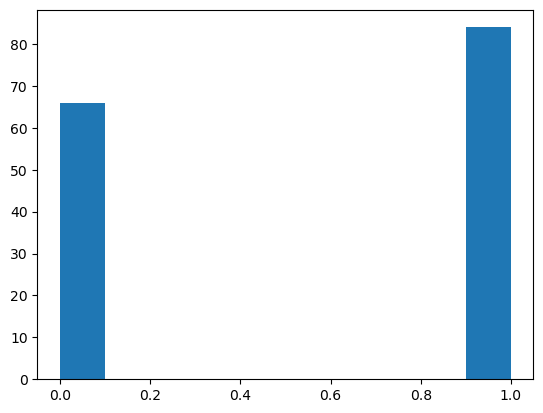

In [ ]:
plt.hist(Y)

(array([12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

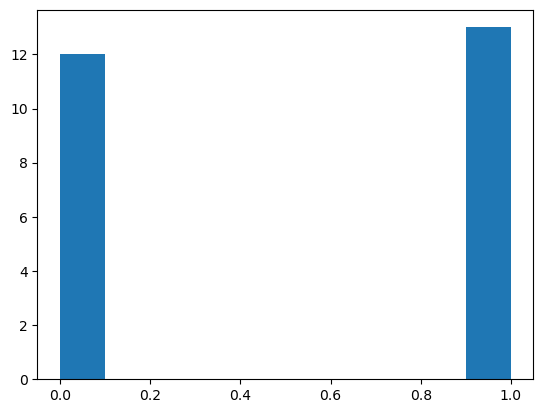

In [ ]:
plt.hist(Y_test[:25])

In [ ]:
a=25
Y_test=Y_test[:a]
X_test=X_test[:a]

# MALA Approach.

Before considering the application, let's make a brief reminder of what MALA consist in a theoretical point of view!
The dynamics is a Langevin dynamics that is here discretized according to the first order Euler discretization (other discretizations exist but we did not regard them in that work), ie. :
\begin{align}
\theta_{n+1} = \theta_n + \frac{\epsilon}{2} \nabla \log p(\theta_n) + \epsilon \cdot z_n
\end{align}

with $z_n$ a random observation from a standard gaussian.

frow which we generate a proposal density, rejected or not according to a Metropolis-Hasting acceptance probability, and therefore theoretically ensuring we will have at the end of the execution a sampling from the best parameters of the bayesian-grounded model (the principle of the MCMC).






In [ ]:
def log_lik(X,Y,beta):
    N=150
    k=10
    beta_t=beta.transpose()
    X_t=X.transpose()
    ll=np.dot(beta_t,np.dot(X_t,Y))
    for i in range(N):
        ll=ll-np.log(1+np.exp(np.dot((X[i,:].reshape(k,1)),beta.reshape(1,k))))
    return ll[0][0]

In [ ]:
log_lik(X,Y,beta_none)

-98.69730803774613

In [ ]:
def link_fun(x):
    return 1/(1+np.exp(-x))

In [ ]:
def density_value(beta,mu,var_):
    beta=beta.reshape(k,1)
    mu=mu.reshape(k,1)
    gap=beta-mu
    gap_t=gap.transpose()
    pi=np.pi
    det=np.linalg.det(var_)
    in_var=np.linalg.inv(var_)
    const_=np.sqrt(((2*np.pi)**k)*det)
    inv_const=np.round(1/const_,100)
    v=np.dot(gap_t,np.dot(in_var,gap))
    x=np.exp((-1/2)*v)
    value=inv_const*x
    return value[0][0]

In [ ]:
X.shape,N

((150, 10), 150)

In [ ]:
def grad_log_lik(X,Y,beta):
    N,k=150,10
    X_t=X.transpose()
    gll=X_t@Y
    for i in range(N):
        value=np.dot(X[i,:],beta)[0]
        gll=gll-link_fun(value)*(X[i,:].reshape(k,1))
    return gll


In [ ]:
grad_log_lik(X,Y,beta_none)

array([[-0.62752098],
       [ 5.99341883],
       [ 3.69173049],
       [ 5.32207142],
       [ 6.55504528],
       [ 6.88127673],
       [ 8.93746588],
       [10.20302024],
       [ 5.8078722 ],
       [ 9.01090276]])

In [ ]:
def mala_drawner(X,Y,curren_beta):
    z=np.random.randn(k,1)
    e=learning_rate
    gll=grad_log_lik(X,Y,curren_beta)
    proposal_value=curren_beta+e*gll+np.sqrt(2*e)*z
    return proposal_value


In [ ]:
mala_drawner(X,Y,beta_none)[0:5],beta_none[0:5]

(array([[-0.03890401],
        [-0.06027847],
        [-0.05959501],
        [-0.03261993],
        [ 0.04846103]]),
 array([[0.01],
        [0.02],
        [0.03],
        [0.04],
        [0.05]]))

In [ ]:
mala_drawner(X,Y,beta_none)

array([[0.04105595],
       [0.03430963],
       [0.014124  ],
       [0.02314845],
       [0.09066723],
       [0.0844937 ],
       [0.14366486],
       [0.11261223],
       [0.16113384],
       [0.08099875]])

In [ ]:
def MALA_proposal_mean(X,Y,current_beta):
   #e=0.001*learning_rate
   e=learning_rate
   gll=grad_log_lik(X,Y,current_beta)
   prop_mean=current_beta+e*gll

   return prop_mean


In [ ]:
MALA_proposal_mean(X,Y,beta_none)

array([[0.00937248],
       [0.02599342],
       [0.03369173],
       [0.04532207],
       [0.05655505],
       [0.06688128],
       [0.07893747],
       [0.09020302],
       [0.09580787],
       [0.1090109 ]])

In [ ]:
def MALA_proposal_var():
    #e=0.001*learning_rate
    e=learning_rate
    prop_var=(e)*np.identity(k)

    return prop_var

In [ ]:
def MALA_aceptance_rate(beta1,beta2,X=X,Y=Y):
    ee=0.00001
    q_var=MALA_proposal_var()
    q_mu1=MALA_proposal_mean(X,Y,beta1)
    q_mu2=MALA_proposal_mean(X,Y,beta2)
    #   prior density
    p1=density_value(beta1,mu,var_)
    p2=density_value(beta2,mu,var_)
    # proposal density
    q1=density_value(beta1,q_mu1,q_var)
    q2=density_value(beta2,q_mu2,q_var)
    rate= ee+ ((p2*q1)+ee)/((p1*q2)+ee)
    return np.log(rate)

In [ ]:
mu=np.zeros(k)
sigma=2 # " dans la papier sigma_square=100"
var_=sigma*sigma*np.identity(k)

In [ ]:
MALA_aceptance_rate(np.zeros(k).reshape(k,1),beta_none)

-0.027546955551936075

In [ ]:
def MALA_one_iter(beta,X=X,Y=Y):
    prop_beta=mala_drawner(X,Y,beta)
    log_rate=MALA_aceptance_rate(beta,prop_beta,X=X,Y=Y)
    u=np.random.uniform(0, 1)
    ee=0.00001
    if (log_rate>0) or (log_rate>np.log(u+ee)):
        return prop_beta
    else :
        return beta


In [ ]:
MALA_one_iter(beta_none,X=X,Y=Y)[0:3],beta_none[0:3]

(array([[0.02274081],
        [0.06130384],
        [0.07552975]]),
 array([[0.01],
        [0.02],
        [0.03]]))

In [ ]:
def MALA_Run(X=X,Y=Y,B=1,initial_state=np.zeros(k).reshape(k,1)):
    current_beta=initial_state
    beta_chaine=[]
    for i in range(B):
        current_beta=MALA_one_iter(current_beta,X=X,Y=Y)
        beta_chaine.append(current_beta)

    return beta_chaine

In [ ]:
MALA_chaine=MALA_Run(B=3000)
Beta_MALA=MALA_chaine[-1]
Beta_MALA[-1],beta_none[-1]

(array([3.89537981]), array([0.1]))

In [ ]:
beta_1_MALA=[MALA_chaine[i][0][0] for i in range(B)]
beta_1_MALA[1:3]

[-0.09417494770231037, -0.04863853995524176]

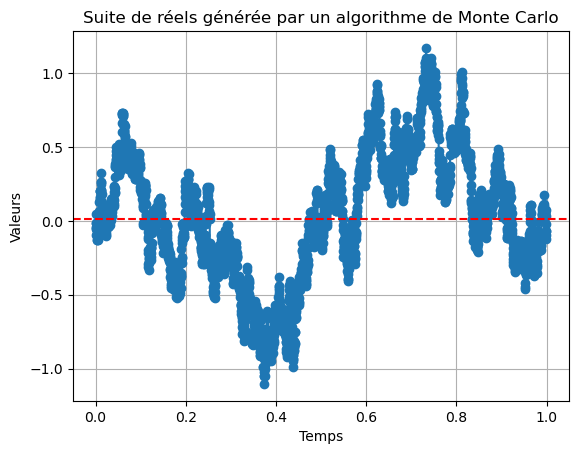

In [ ]:
import matplotlib.pyplot as plt

# Liste des valeurs générées
valeurs = beta_1_MALA # Remplacez ... par vos valeurs

# Liste des instants de temps correspondants
temps = [i/3000 for i in range(3000)]  # Remplacez ... par vos instants de temps

# Tracé du graphique
plt.plot(temps, valeurs, marker='o', linestyle='-')
plt.axhline(y=beta_none[0], color='r', linestyle='--', label='y=2')


# Ajout de titres et d'étiquettes d'axe
plt.title('Suite de réels générée par un MALA')
plt.xlabel('Temps')
plt.ylabel('Valeurs')

# Affichage du graphique
plt.grid(True)  # Ajoute une grille
plt.show()


In [ ]:
def predictor(X,beta_hat):
    N=X.shape[0]
    Pred_Probas=np.zeros(N)
    Y_pred=np.zeros(N)
    for i in range(N):
        value=np.dot(X[i,:],beta_hat)[0]
        Pred_Probas[i]=link_fun(value)
        Y_pred[i]=indicator(Pred_Probas[i]-0.5)

    return Y_pred

In [ ]:
beta_MALA=MALA_chaine[-1]
y_pred_MALA = predictor(X,beta_MALA)
y_pred_MALA.shape

(150,)

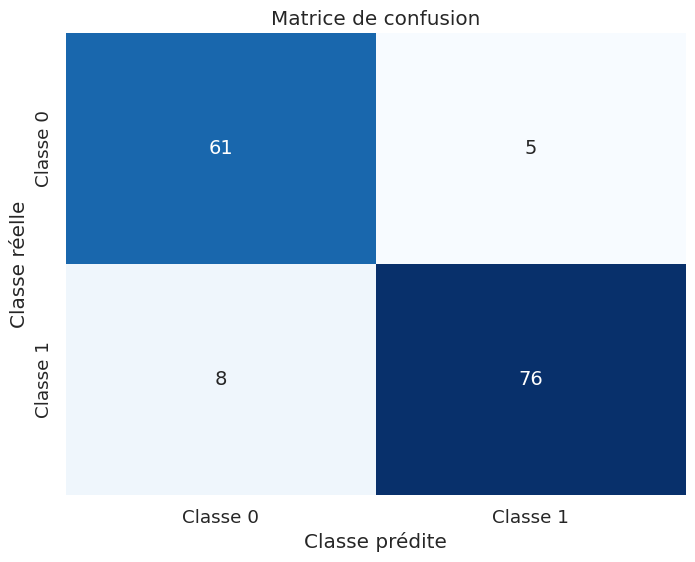

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y, y_pred_MALA)

# Étiquettes des classes
class_names = ['Classe 0', 'Classe 1']

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuster la taille de la police
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion')
plt.show()


In [ ]:
beta_MALA=MALA_chaine[-1]
y_pred_test_MALA = predictor(X_test,beta_MALA)
y_pred_test_MALA.shape

(25,)

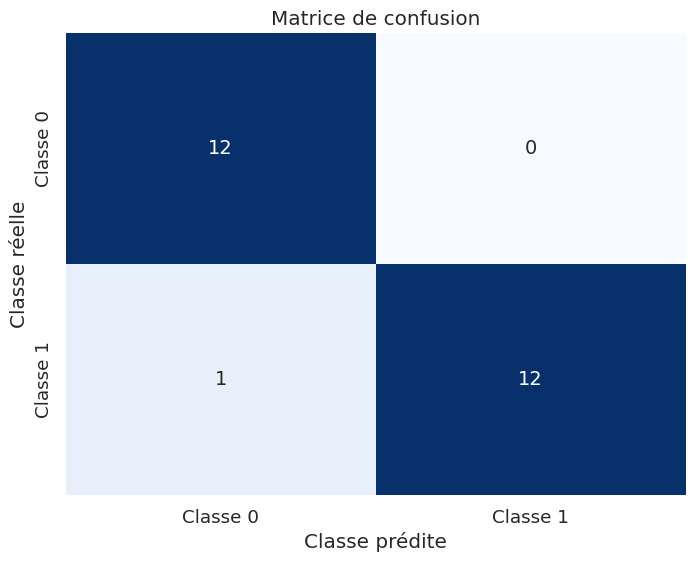

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_test_MALA)

# Étiquettes des classes
class_names = ['Classe 0', 'Classe 1']

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuster la taille de la police
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion')
plt.show()


# mMALA Approach

Before considering the code, let's see what is the theoretical background ot the mMala. mMala's trajectory is somehow more sophisticated than the Mala's one as it tries to take advantage of a geometrics induced by the specfication of the model, ie. it will focus on some parts of the considered space ($R^n$ for example). What is in charge of doing so is G, a matrix (metric tensor) that is embedded in the dynamics. So, let's see the mMala dynamics, which is in continuous:

$\theta(t) = \theta_0 + \int_{0}^{t} \frac{\epsilon}{2} \nabla \log p(\theta(s)) \, ds + \epsilon \int_{0}^{t}\, dB_s$

avec ici  $ dB_ {i} $ (t)=|G( $ \theta $ (t)) $ |^ {-1/2} $ $ $ $ \sum _ {i=1}^ {n} $ $ \frac {\partial}{\partial \theta_j } $ ( $ G^ {-1} $ $ (\theta (t))_ {ij} $ |G( $\theta $ (t))| $ ^ {2} $ )dt+( $ \sqrt{G}^{-1} $ ( $ \theta $ (t))db(t)

where b is a standard gaussian.

 $ \theta _ {i}^ {n+1} $
= $ \theta _ {i}^ {n} $ + $ \frac {\epsilon ^ {2}}{2} $ $ (G^ {-1}(\theta ^ {n})\nabla L(\theta ^ {n}))_ {i} $ - $ \epsilon ^ {2} $ $ \sum _ {i=1}^ {D} $ ( $ G^ {-1} $ ( $ \theta ^ {n} $ ) $ \frac {\partial G(\partial ^ {n})}{\partial\theta _ {j}} $ $ G^ {-1} $ ( $ \theta ^ {n} $ ) +  $ \frac {\epsilon^ {2}}{2} $ $ \sum _ {i=1}^ {n} $ $ (G^ {-1}(\theta ^ {n}))_ {ij} $ Tr( $ G^ {-1} $ ( $ \theta ^ {n} $ ) $ \frac {\partial G(\theta ^ {n})}{\partial\theta ;} $ ) +($\epsilon$$\sqrt {G^ {-1}(\theta ^ {n})^ {n}} $ )

The choice of G is not unique (there are as much G as models) but in our case (bayesian logistic regression) we computed the following metric G:

G( $ \beta $ )= $ E_ {t, x, \beta,\alpha}$(-$\nabla$ $ \nabla $ L( $ \beta $ )+ $ \alpha ^ {-1} $ $ I $) =x'Ax+ $ \alpha ^ {-1} $ $I$

Which is determined according to the log-likelihood of the model.








In [ ]:
def get_Lambda_Matrix(X,beta):
    beta_t=beta.reshape(k,1)
    left_real_values=[link_fun(np.dot(X[i,:].reshape(1,k),beta_t)[0][0]) for i in range(N)]
    real_values=[np.round(left_real_values[i]*(1-left_real_values[i]),100) for i in range(N)]
    Lambda_matrix=np.diag(real_values)

    return Lambda_matrix


In [ ]:
get_Lambda_Matrix(X,beta_none).shape

(150, 150)

In [ ]:
def Tensor_metric_G(X,beta):
    Lambda_Matrix=get_Lambda_Matrix(X,beta)
    X_t=X.transpose()
    G_of_beta=X_t@(Lambda_Matrix@X)-sigma*np.identity(k)

    return G_of_beta

In [ ]:
Tensor_metric_G(X,beta_none).shape

(10, 10)

In [ ]:
def compute_V_i(X,i,beta):
    #diag_elts=[(1-2*link_fun_value(X[n],beta_))*X[n,i] for n in range(N)]
    beta_t=beta.reshape(1,k)
    diag_elts=[(1-2*link_fun(np.dot(X[i,:].reshape(k,1),beta_t)[0][0])) for i in range(N)]
    V_i_Matrix=np.diag(diag_elts)
    return V_i_Matrix

In [ ]:
def get_G_partial_derivative(X,i,beta):
    X_t=X.transpose()
    Lambda_Matrix=get_Lambda_Matrix(X,beta) #get_Lambda_Matrix(X,beta_none)
    V_i_Matrix=compute_V_i(X,i,beta)
    G_partial_derivative_Matrix=X_t@Lambda_Matrix@V_i_Matrix@X

    return G_partial_derivative_Matrix

In [ ]:
compute_V_i(X,0,beta_none).shape

(150, 150)

In [ ]:
get_G_partial_derivative(X,0,beta_none).shape

(10, 10)

In [ ]:
def proposal_Distribution_mean(X,Y,beta):
    e=learning_rate
    G=Tensor_metric_G(X,beta) #Tensor_metric_G(X,beta)
    inv_G=np.linalg.inv(G)

    term2=(1/2)*(e**2)*inv_G@grad_log_lik(X,Y,beta)
    term3=np.zeros(k)
    term4=np.zeros(k)
    for j in range(k):
        term3=term3-(e**2)*(inv_G@get_G_partial_derivative(X,j,beta)@inv_G)[:,j]
    for j in range(k):
        terme4=term4+(e**2)*inv_G[:,j]*np.trace(inv_G@get_G_partial_derivative(X,j,beta))

    proposal_mean=beta.reshape(k,1)+term2+term3.reshape(k,1)+term4.reshape(k,1)
    return proposal_mean


In [ ]:
proposal_Distribution_mean(X,Y,beta_none).shape


(10, 1)

In [ ]:
def get_matrix_sqrt(X):
    U, s, V = np.linalg.svd(X)

# Racine carrée des valeurs singulières
    s_sqrt = np.sqrt(s)

# Reconstruction de la matrice racine carrée
    X_sqrt = U.dot(np.diag(s_sqrt)).dot(V)

    return X_sqrt

In [ ]:
def proposal_Distribution_std_matrix_fun(X,beta): # c'est plutot l'cartype
    e=learning_rate
    G=Tensor_metric_G(X,beta)
    inv_G=np.linalg.inv(G)
    inv_G_sqrt=get_matrix_sqrt(inv_G)

    return e*inv_G_sqrt

In [ ]:
proposal_Distribution_std_matrix_fun(X,beta_none).shape

(10, 10)

In [ ]:
proposal_Distribution_std_matrix_fun(X,beta_none).shape

(10, 10)

In [ ]:
def beta_drawner(X,Y,beta):
    mean_=proposal_Distribution_mean(X,Y,beta) #( 10,1)
    std_matrix=proposal_Distribution_std_matrix_fun(X,beta)  # (10,10)
    Z=np.random.randn(k,1)
    proposed_teta=mean_+std_matrix@Z

    return proposed_teta

In [ ]:
beta_drawner(X,Y,beta_none).shape

(10, 1)

In [ ]:
def Acceptance_Rati(beta1, beta2, X, Y, ):

    ee=0.00001
    q_mu1=proposal_Distribution_mean(X,Y,beta1)
    q_mu2=proposal_Distribution_mean(X,Y,beta2)
    #   prior density
    var_=std@(std.transpose())
    p1=density_value(beta1,mu,var_)
    p2=density_value(beta2,mu,var_)
    # proposal density
    std1=proposal_Distribution_std_matrix_fun(X,beta1)
    std2=proposal_Distribution_std_matrix_fun(X,beta2)
    q_var1=std1@(std1.transpose())
    q_var2=std1@(std2.transpose())


    q1=density_value(beta1,q_mu1,q_var1)
    q2=density_value(beta2,q_mu2,q_var2)
    rate= ee+ ((p2*q1)+ee)/((p1*q2)+ee)
    return np.log(rate)



In [ ]:
Acceptance_Rati(beta_none,beta_none,X,Y)

9.999950000398841e-06

In [ ]:
def mMALA_one_iter(beta,X=X,Y=Y):
    prop_beta=beta_drawner(X,Y,beta)
    log_rate=Acceptance_Rati(beta,prop_beta,X=X,Y=Y)
    u=np.random.uniform(0, 1)
    ee=0.00001
    if (log_rate>0) or (log_rate>np.log(u+ee)):
        return prop_beta
    else :
        return beta


In [ ]:
mMALA_one_iter(beta_none)

array([[0.00995055],
       [0.02049216],
       [0.02936461],
       [0.03641798],
       [0.05039752],
       [0.05945114],
       [0.06971794],
       [0.0804746 ],
       [0.08927876],
       [0.1003917 ]])

In [ ]:
def mMALA_Run(X=X,Y=Y,B=1,initial_state=np.zeros(k).reshape(k,1)):
    current_beta=initial_state
    beta_chaine=[]
    for i in range(B):
        current_beta=mMALA_one_iter(current_beta,X=X,Y=Y)
        beta_chaine.append(current_beta)

    return beta_chaine


In [ ]:
mMALA_chaine=mMALA_Run(B=3000)
Beta_mMALA=mMALA_chaine[-1]
Beta_mMALA[-1],beta_none[-1]

(array([-0.01759786]), array([0.1]))

In [ ]:
beta_1_mMALA=[mMALA_chaine[i][0][0] for i in range(B)]
beta_1_mMALA[1:3]

[0.00035288929885345446, 0.0013373107931075562]

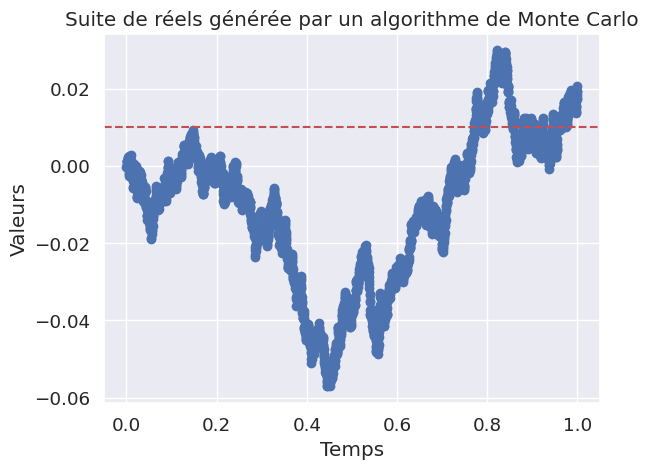

In [ ]:
import matplotlib.pyplot as plt

# Liste des valeurs générées
valeurs = beta_1_mMALA # Remplacez ... par vos valeurs

# Liste des instants de temps correspondants
temps = [i/3000 for i in range(3000)]  # Remplacez ... par vos instants de temps

# Tracé du graphique
plt.plot(temps, valeurs, marker='o', linestyle='-')
plt.axhline(y=beta_none[0], color='r', linestyle='--', label='y=2')


# Ajout de titres et d'étiquettes d'axe
plt.title('Suite de réels générée par un algorithme de Monte Carlo')
plt.xlabel('Temps')
plt.ylabel('Valeurs')

# Affichage du graphique
plt.grid(True)  # Ajoute une grille
plt.show()


In [ ]:
beta_mMALA=mMALA_chaine[-1]
y_pred_mMALA = predictor(X,beta_mMALA)
y_pred_mMALA.shape

(150,)

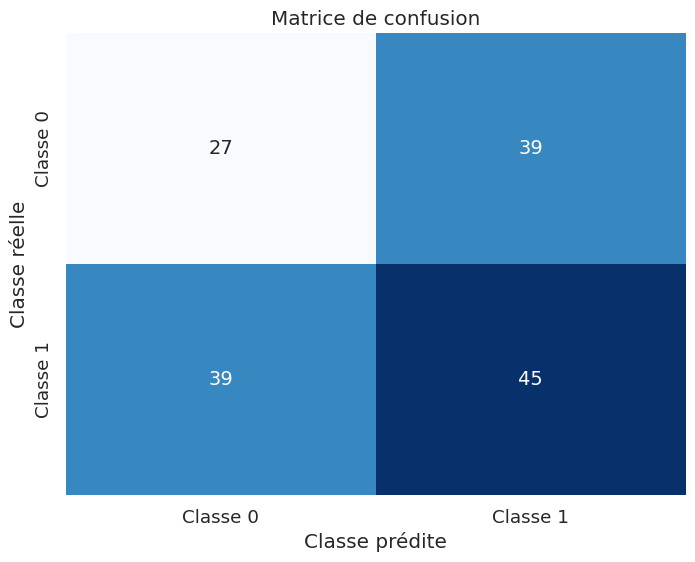

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y, y_pred_mMALA)

# Étiquettes des classes
class_names = ['Classe 0', 'Classe 1']

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuster la taille de la police
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion')
plt.show()


In [ ]:
beta_mMALA=mMALA_chaine[-1]
y_pred_test_mMALA = predictor(X_test,beta_mMALA)
y_pred_test_mMALA.shape

(25,)

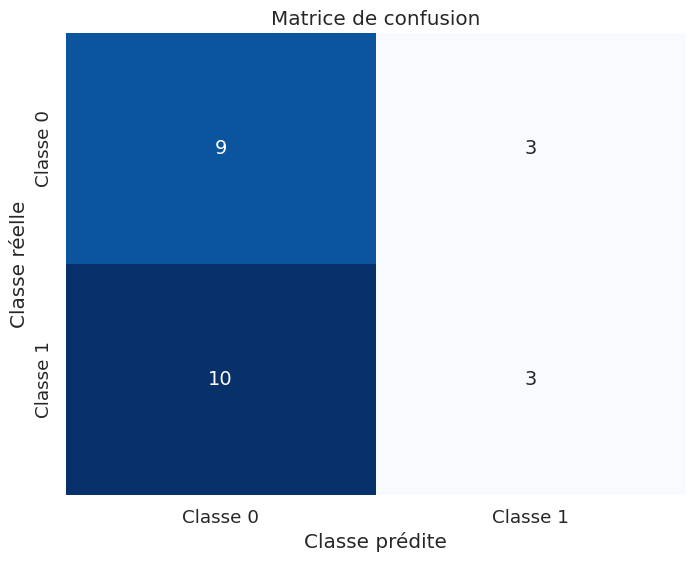

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_test_mMALA)

# Étiquettes des classes
class_names = ['Classe 0', 'Classe 1']

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuster la taille de la police
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion')
plt.show()
